<a href="https://colab.research.google.com/github/kameshcodes/deep-learning-codes/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

In [166]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [167]:
X,y = make_classification(n_features = 2, n_redundant=0)

In [168]:
X[:10]

array([[-1.878928  , -0.28039613],
       [ 0.16266522, -1.32062504],
       [ 1.19777159,  0.79442517],
       [-1.34896948, -1.04270851],
       [-0.56239135, -0.60075889],
       [-0.79679378,  1.53018007],
       [-1.09092457, -0.95021862],
       [ 0.47539099,  2.23388188],
       [ 1.60722705, -0.45282832],
       [-0.22420061, -1.5587698 ]])

In [169]:
y[:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

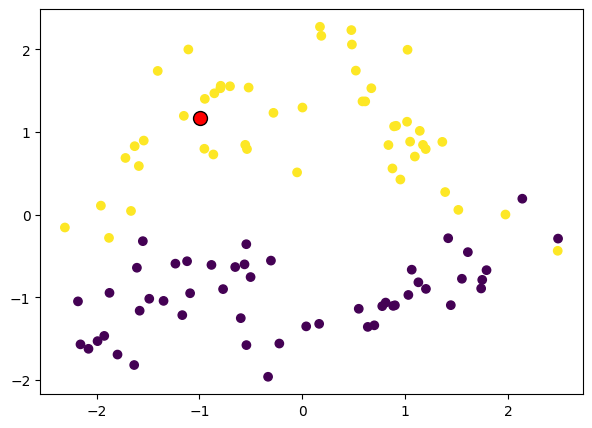

In [170]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(X[20, 0], X[20, 1], c='red', s=100, edgecolor='black', label='Point at Index 0')

# **Steps:**
1. Calculate Eucledian Distance
2. Find Nearest Neighbour
3. Assign Labels

## Step 1

In [171]:
def calc_dist_btw_row(r1, r2):
  diff = r2-r1
  sq_of_diff = np.square(diff)
  sum_of_sq_diff = np.sum(sq_of_diff)
  return np.sqrt(sum_of_sq_diff)

In [172]:
r1 = [2,4]
r2 = [1,2]
r1 = np.array(r1)
r2 = np.array(r2)
calc_dist_btw_row(r1, r2)

2.23606797749979

**Distance Calculation**

Given:
- $r_1 = (2, 4)$
- $r_2 = (1, 2)$

Using the formula:


$$d(r_1, r_2) = \sqrt{(1 - 2)^2 + (2 - 4)^2}$$

$$d(r_1, r_2) = \sqrt{5} \approx 2.24$$


## Step 2 : Get the Nearest Neigbour

In [173]:
def get_dist_set(data, pt):
  dist = []
  for obs in data:
    if not np.array_equal(obs[:-1], pt):
      dist.append((obs, calc_dist_btw_row(obs[:-1], pt)))
  return dist

In [174]:
def get_K_nearest_nbr(data, pt, k):
  dist = get_dist_set(data, pt)
  dist.sort(key = lambda x:x[1])

  nbr = []
  for i in range(k-1):
    nbr.append(dist[i][0])
  return nbr

In [175]:
pt = data[0][:-1]
pt

array([0.31751285, 0.16528017])

In [176]:
data[1][:-1]

array([-0.48004045, -0.5461301 ])

In [177]:
get_K_nearest_nbr(data, pt, 3)

[array([0.34617193, 0.16723887, 0.        ]),
 array([0.38398995, 0.18436989, 0.        ])]

## Step 3: Assign Labels

In [178]:
def predict(data, pt, k):
  nbr = get_K_nearest_nbr(data, pt, k)
  nbr_labels = [row[-1] for row in nbr]
  pred = max(set(nbr_labels), key=nbr_labels.count)
  return pred

# Testing

In [179]:
data = np.concatenate((X, y.reshape(-1, 1)), axis=1)

prediction class:  0.0 




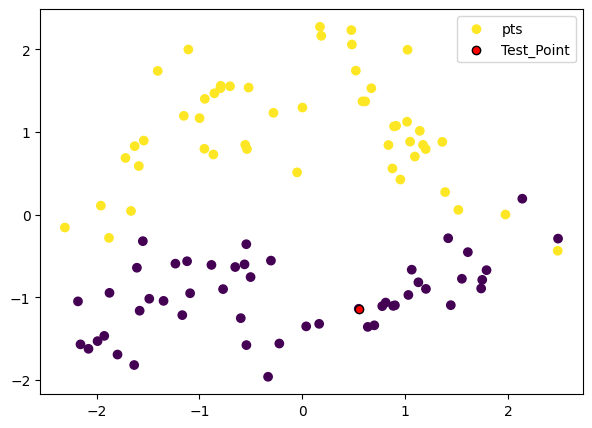

In [180]:
pt = data[10][:-1]
k = 3


print("prediction class: ", predict(data, pt, k), '\n\n')
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c = y, label = 'pts')
plt.scatter(pt[0], pt[1], c='red', edgecolor='black', label='Test_Point')
plt.legend(loc='best')
plt.show()

prediction class:  0.0 




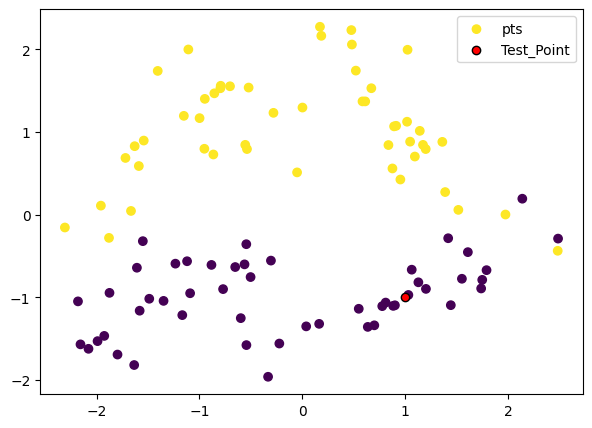

In [181]:
pt = np.array([1,-1])
k = 3


print("prediction class: ", predict(data, pt, k), '\n\n')
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c = y, label = 'pts')
plt.scatter(pt[0], pt[1], c='red', edgecolor='black', label='Test_Point')
plt.legend(loc='best')
plt.show()

prediction class:  0.0 




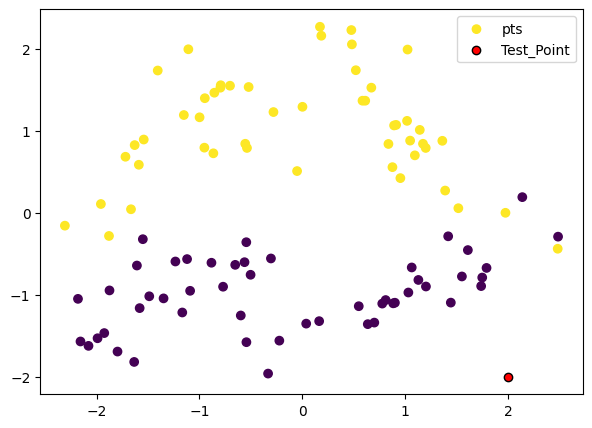

In [182]:
pt = np.array([2,-2])
k = 3


print("prediction class: ", predict(data, pt, k), '\n\n')
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c = y, label = 'pts')
plt.scatter(pt[0], pt[1], c='red', edgecolor='black', label='Test_Point')
plt.legend(loc='best')
plt.show()

In [183]:
data[0][:-1]

array([-1.878928  , -0.28039613])

In [184]:
X_test , y_test = make_classification(n_features = 2, n_redundant=0)

In [185]:
y_pred = []
for pt in X_test:
  y_p = predict(data, pt, k)
  y_pred.append(y_p)

In [186]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.36      0.43      0.39        42
         1.0       0.52      0.45      0.48        58

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.45      0.44      0.44       100



In [187]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors= 3, algorithm='brute')

In [188]:
model.fit(X, y)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [189]:
pred = model.predict(X_test)

In [190]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.45      0.34      0.39        50
           1       0.47      0.58      0.52        50

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.46      0.45       100

